## Using Keras to Build and Train Neural Networks

In this assignment you will use a neural network to predict diabetes using the Pima Diabetes Dataset.  You will use the Keras package to quickly build and train a neural network and compare the performance. 


## UCI Pima Diabetes Dataset

* UCI ML Repositiory (http://archive.ics.uci.edu/ml/datasets/Pima+Indians+Diabetes)

### Attributes: (all numeric-valued)
   1. Number of times pregnant
   2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
   3. Diastolic blood pressure (mm Hg)
   4. Triceps skin fold thickness (mm)
   5. 2-Hour serum insulin (mu U/ml)
   6. Body mass index (weight in kg/(height in m)^2)
   7. Diabetes pedigree function
   8. Age (years)
   9. Class variable (0 or 1)

The UCI Pima Diabetes Dataset which has 8 numerical predictors and a binary outcome.

## Questions

### Part 1: Build a Baseline Model

Use the Sequential model to quickly build a baseline neural network with one single hidden layer with 12 nodes.\

1 Read and load data into Python \
2 Explore and pre-process the dataset \
3 Split the data to training and testing dataset (75%, 25%)\
4 Build the baseline model and find how many parameters does your model have?\
5 Train you model with 20 epochs with RMSProp at a learning rate of .001 and a batch size of 128\
6 Graph the trajectory of the loss functions, accuracy on both train and test set.\
7 Evaluate and interpret the accuracy and loss performance during training, and testing. 

### Part 2: Find the Best Model

Now  try four different models and see if you can improve the accuracy by focusing on different network structures (i.e, activation functions, optimization algorithms, batch sizes, number of epochs, ...), affecting the performance, training time, and level of overfitting (or underfitting).

8. For all your models, plot the ROC curve for the predictions.
9. Which model has best performance, why?
10. Save your best model weights into a binary file.


Submit two files: the Jupyter notebook with your code and answers and its print out PDF.


## Part 1: Build a Baseline Model

In [2]:
%%capture
!pip install tqdm
!pip install torch torchvision torchaudio

In [3]:
%%capture
pip install keras-tuner --upgrade

In [1]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [2]:
tf.debugging.set_log_device_placement(True)

#### Import eda initial libraries ####

In [3]:
import numpy as np
import pandas as pd
from datetime import datetime, date, timedelta
import os
import math
import warnings 
from datetime import datetime, date, timedelta
import pyodbc
import time
import pickle
import boto3
from io import BytesIO
import re 
import matplotlib.pyplot as plt
import torch

plt.style.use('seaborn')

import seaborn as sns
from IPython.display import Image

from tqdm import tqdm

In [4]:
warnings.filterwarnings("ignore")

#### Read csv  diabates file ####

In [5]:
import os
os.getcwd()

'/home/ec2-user/SageMaker/DAAN 570/Lesson 6'

In [6]:
import time
start_time = time.time()

df =  pd.read_csv(r"/home/ec2-user/SageMaker/DAAN 570/Lesson 6/pima-indians-diabetes.csv", encoding="utf-8",
                  skip_blank_lines=True,
                  names=['Pregnancies',  'Glucose',  'BloodPressure',  'SkinThickness', 
                        'Insulin',  'BMI',  'DiabetesPedigreeFunction',  'Age','Outcome']) 

### clean columns names

df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

df.reset_index(drop=True, inplace=True)

print("--- %s seconds ---" % (time.time() - start_time))    

--- 0.011742591857910156 seconds ---


In [7]:

df.columns

Index(['pregnancies', 'glucose', 'bloodpressure', 'skinthickness', 'insulin',
       'bmi', 'diabetespedigreefunction', 'age', 'outcome'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pregnancies               768 non-null    int64  
 1   glucose                   768 non-null    int64  
 2   bloodpressure             768 non-null    int64  
 3   skinthickness             768 non-null    int64  
 4   insulin                   768 non-null    int64  
 5   bmi                       768 non-null    float64
 6   diabetespedigreefunction  768 non-null    float64
 7   age                       768 non-null    int64  
 8   outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
df.dtypes

pregnancies                   int64
glucose                       int64
bloodpressure                 int64
skinthickness                 int64
insulin                       int64
bmi                         float64
diabetespedigreefunction    float64
age                           int64
outcome                       int64
dtype: object

In [10]:
df.shape

(768, 9)

In [11]:
import pandas as pd
from pandas import option_context

with option_context("display.max_rows", None,"display.max_colwidth",60,"display.max_columns",50):
        display(df.head(2))

pregnancies  glucose  bloodpressure  skinthickness  insulin   bmi  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   

   diabetespedigreefunction  age  outcome  
0                     0.627   50        1  
1                     0.351   31        0


###### missing values #####

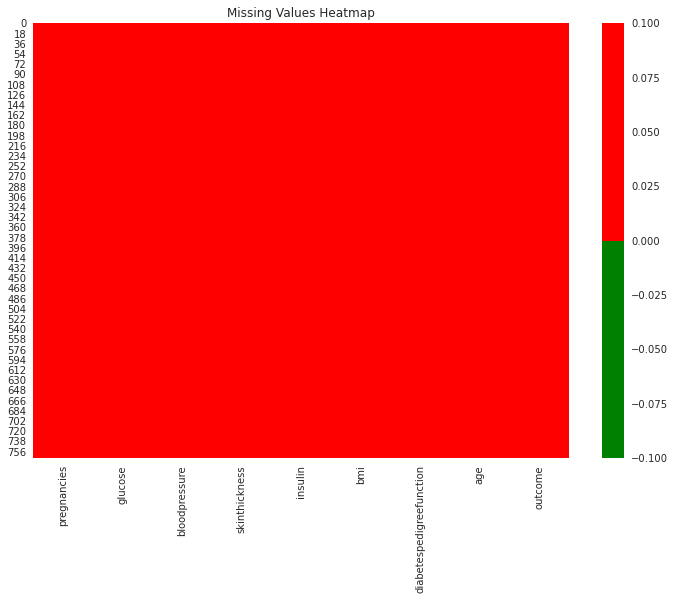

In [12]:
cols = df.columns 
colours = ['g', 'r'] 
f, ax = plt.subplots(figsize = (12,8))
sns.set_style("whitegrid")
plt.title('Missing Values Heatmap', )
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours));

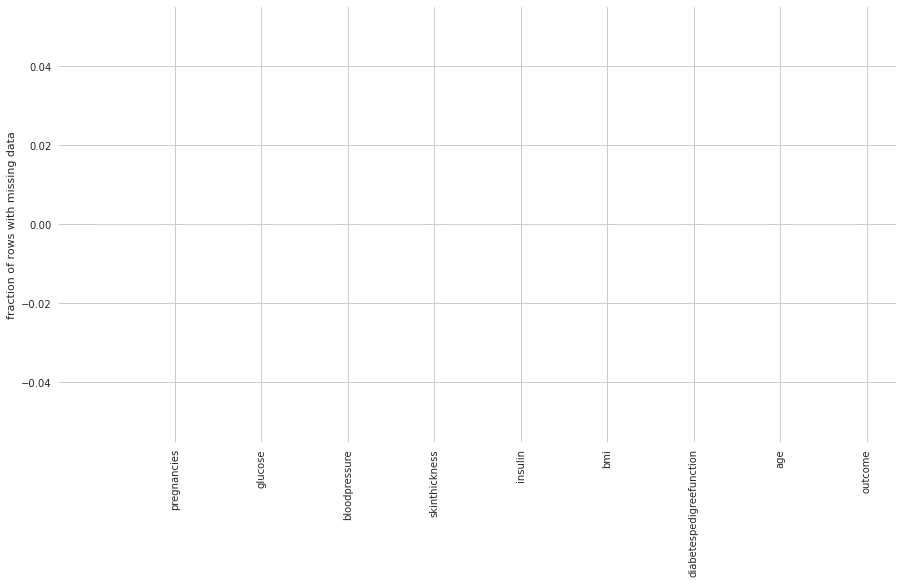

In [13]:
null_counts = df.isnull().sum()/len(df)
plt.figure(figsize=(15,8))
plt.xticks(np.arange(len(null_counts))+0.5,null_counts.index,rotation='vertical')
plt.ylabel('fraction of rows with missing data')
plt.bar(np.arange(len(null_counts)),null_counts)
plt.show()

In [14]:
missing_count = df.isnull().sum() # the count of missing values
value_count = df.isnull().count() # the count of all values 
missing_percentage = round(missing_count / value_count * 100,2) #the percentage of missing values
missing_df = pd.DataFrame({'count': missing_count, 'percentage': missing_percentage}) #create a dataframe
print(missing_df)

                          count  percentage
pregnancies                   0         0.0
glucose                       0         0.0
bloodpressure                 0         0.0
skinthickness                 0         0.0
insulin                       0         0.0
bmi                           0         0.0
diabetespedigreefunction      0         0.0
age                           0         0.0
outcome                       0         0.0


##### We have 0 missing values in our data but let's verify this out with the describe function, bc sometimes null values are presence as 0

##### General summary statistics 

In [15]:
import pandas as pd
from pandas import option_context

with option_context("display.max_rows", None,"display.max_colwidth",60,"display.max_columns",50):
        display(df.describe().transpose())

count        mean         std     min       25%  \
pregnancies               768.0    3.845052    3.369578   0.000   1.00000   
glucose                   768.0  120.894531   31.972618   0.000  99.00000   
bloodpressure             768.0   69.105469   19.355807   0.000  62.00000   
skinthickness             768.0   20.536458   15.952218   0.000   0.00000   
insulin                   768.0   79.799479  115.244002   0.000   0.00000   
bmi                       768.0   31.992578    7.884160   0.000  27.30000   
diabetespedigreefunction  768.0    0.471876    0.331329   0.078   0.24375   
age                       768.0   33.240885   11.760232  21.000  24.00000   
outcome                   768.0    0.348958    0.476951   0.000   0.00000   

                               50%        75%     max  
pregnancies                 3.0000    6.00000   17.00  
glucose                   117.0000  140.25000  199.00  
bloodpressure              72.0000   80.00000  122.00  
skinthickness              23.0000   32.00000   99.00  
insulin                    30.5000  127.25000  846.00  
bmi                        32.0000   36.60000   67.10  
diabetespedigreefunction    0.3725    0.62625    2.42  
age                        29.0000   41.00000   81.00  
outcome                     0.0000    1.00000    1.00

In [16]:
##### The summary table above show us that the foollowing columns or variables have an invalid zero value:
##### (pregnancies is ok with 0 is nominal and logical)

###### 'glucose'
###### 'bloodpressure'
###### 'skinthickness'
###### 'insulin',
###### 'bmi'

#### It is almost imposible than somebody has 0 bmi

In [17]:
###### Let's replace those 0 values with na and looks at their ind distribution for data imputation. We can't drop data bc we only
##### have 768 total observations

In [18]:
df.columns

Index(['pregnancies', 'glucose', 'bloodpressure', 'skinthickness', 'insulin',
       'bmi', 'diabetespedigreefunction', 'age', 'outcome'],
      dtype='object')

In [19]:
import time
start_time = time.time()

df[['glucose', 'bloodpressure', 'skinthickness', 'insulin',
       'bmi']] = df[['glucose', 'bloodpressure', 'skinthickness', 'insulin',
       'bmi']].replace(0,np.NaN)

print("--- %s seconds ---" % (time.time() - start_time))    

--- 0.006682872772216797 seconds ---


In [20]:
missing_count = df.isnull().sum() # the count of missing values
value_count = df.isnull().count() # the count of all values 
missing_percentage = round(missing_count / value_count * 100,2) #the percentage of missing values
missing_df = pd.DataFrame({'count': missing_count, 'percentage': missing_percentage}) #create a dataframe
print(missing_df)

                          count  percentage
pregnancies                   0        0.00
glucose                       5        0.65
bloodpressure                35        4.56
skinthickness               227       29.56
insulin                     374       48.70
bmi                          11        1.43
diabetespedigreefunction      0        0.00
age                           0        0.00
outcome                       0        0.00


In [21]:
#### Now we can see the true missing values in each of our columns
#### 48 % of insulin records are missing

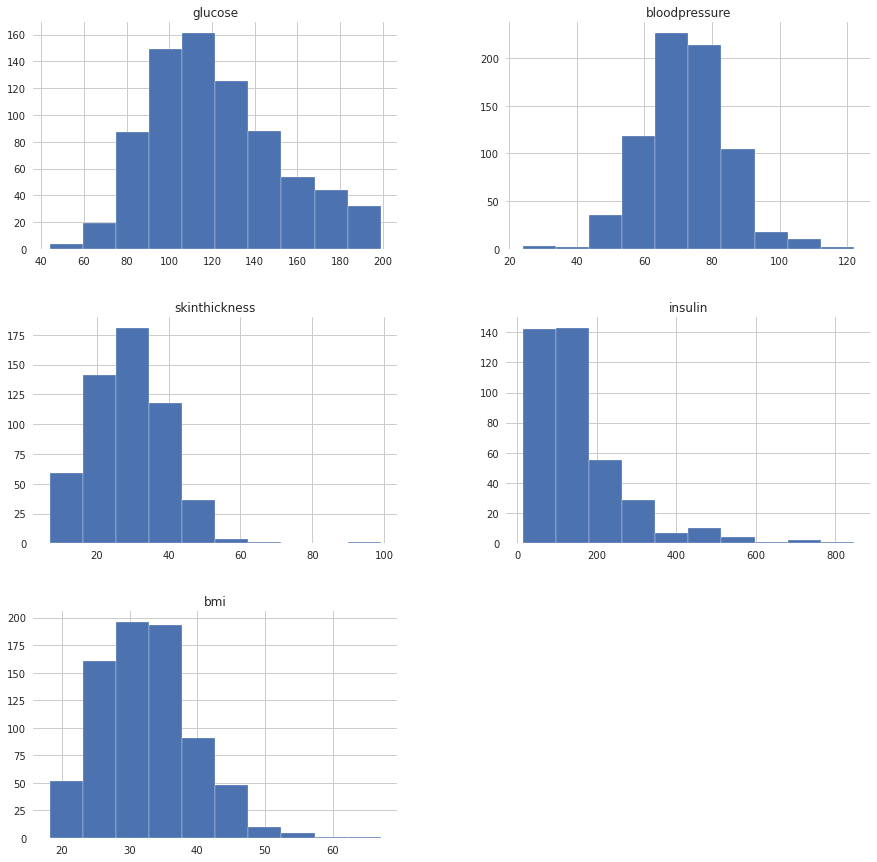

In [22]:
df[['glucose', 'bloodpressure', 'skinthickness', 'insulin',
       'bmi']].hist(figsize = (15,15))
plt.show()

In [23]:
##### let's impute our missing values based on the histograms above ######

In [24]:
df.columns

Index(['pregnancies', 'glucose', 'bloodpressure', 'skinthickness', 'insulin',
       'bmi', 'diabetespedigreefunction', 'age', 'outcome'],
      dtype='object')

In [25]:
import time
start_time = time.time()


df['glucose'].fillna(df['glucose'].mean(), inplace = True)
df['bloodpressure'].fillna(df['bloodpressure'].mean(), inplace = True)
df['skinthickness'].fillna(df['skinthickness'].median(), inplace = True)
df['insulin'].fillna(df['insulin'].median(), inplace = True)
df['bmi'].fillna(df['bmi'].median(), inplace = True)



print("--- %s seconds ---" % (time.time() - start_time))   

--- 0.003226757049560547 seconds ---


In [26]:
##### Plotting after 0 / na values removal######

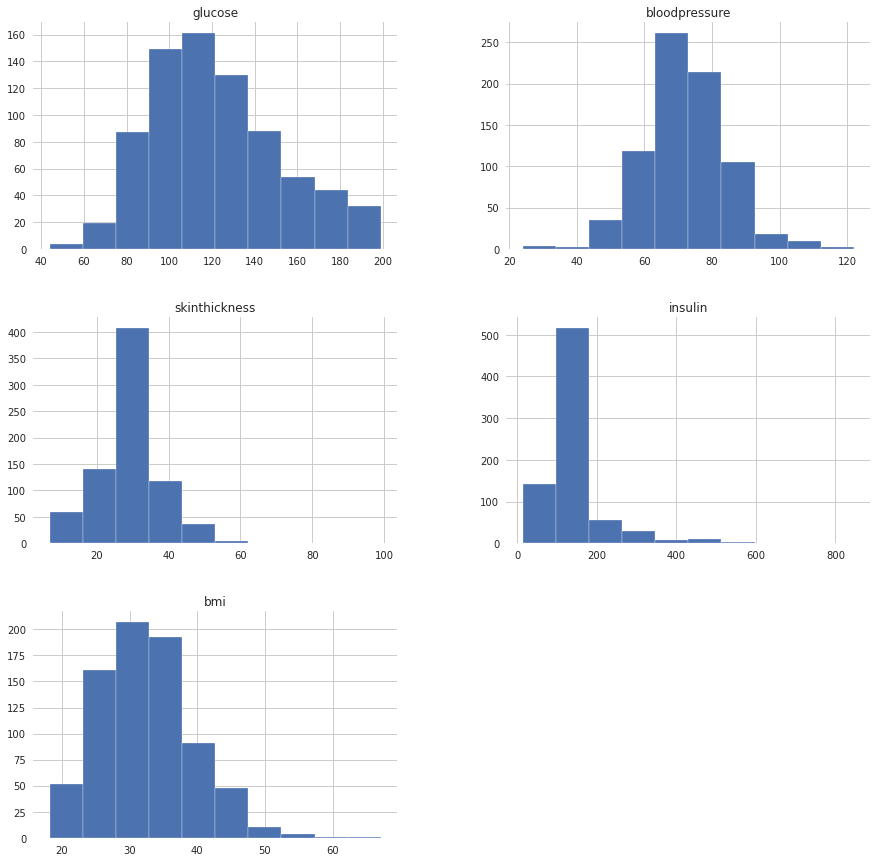

In [27]:
df[['glucose', 'bloodpressure', 'skinthickness', 'insulin',
       'bmi']].hist(figsize = (15,15))
plt.show()

In [28]:
df.dtypes

pregnancies                   int64
glucose                     float64
bloodpressure               float64
skinthickness               float64
insulin                     float64
bmi                         float64
diabetespedigreefunction    float64
age                           int64
outcome                       int64
dtype: object

##### Plot class distribution ######

In [29]:
df.outcome.value_counts()

0    500
1    268
Name: outcome, dtype: int64

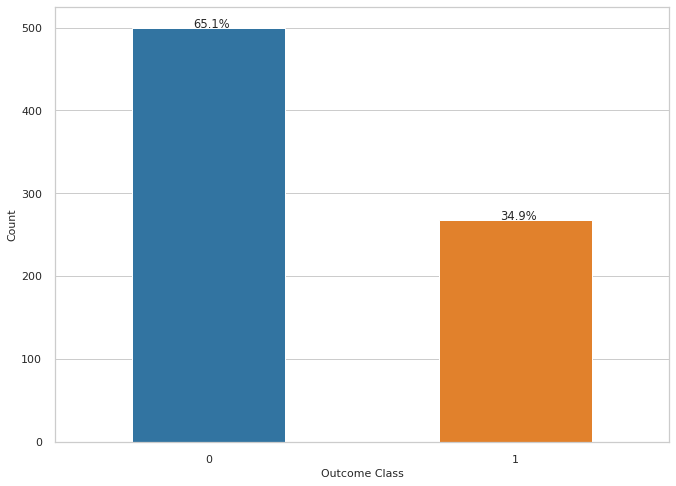

In [30]:
sns.set(style="whitegrid")
plt.figure(figsize=(11,8))

color_labels = df.outcome.unique()

# List of color palette to use
rgb_values = sns.color_palette("tab10", 2)

# Map label to color palette

color_map = dict(zip(color_labels, rgb_values))


ax = sns.countplot(x="outcome", data=df,palette=df['outcome'].map(color_map))

plt.xticks(size=11)
plt.xlabel('Outcome Class', size=  11)
plt.yticks(size=11)
plt.ylabel('Count', size=  11)

def without_hue(plot, feature):
    total = len(feature)
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 11.5)
    plt.show()
    
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

change_width(ax, .50)

without_hue(ax, df.outcome)
plt.show()

In [31]:
###### There is some imbalance nature in our data ######

##### Outliers ######

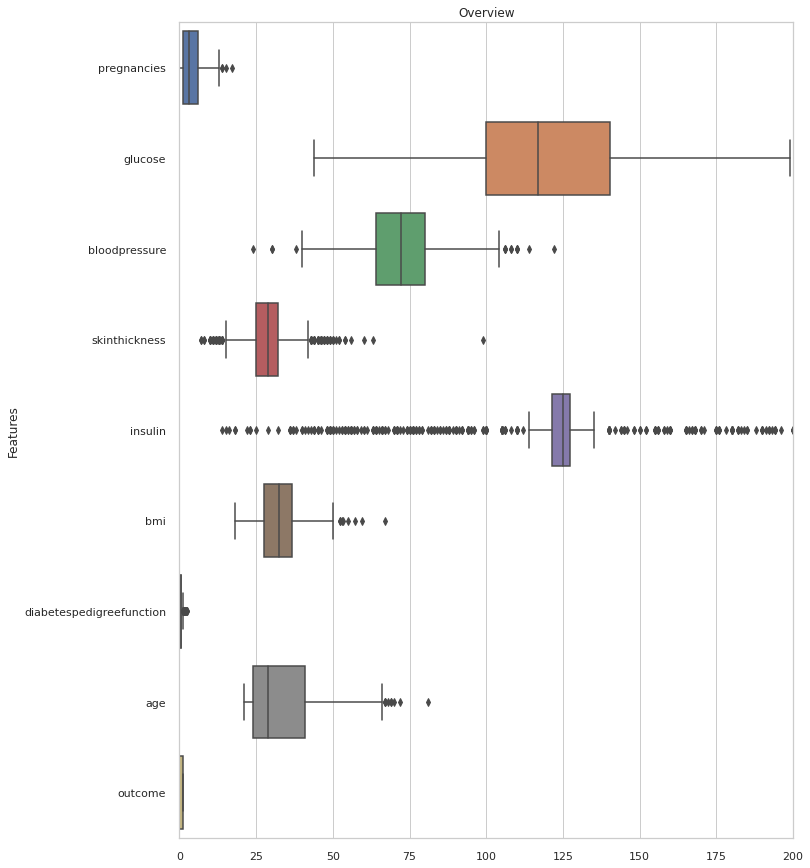

In [32]:
sns.set(style="whitegrid") 

f, ax = plt.subplots(figsize=(11, 15))

#ax.set_facecolor('#B1DEFD')
ax.set(xlim=(-.05, 200))
plt.ylabel('Features')
plt.title("Overview")
ax = sns.boxplot(data = df, 
  orient = 'h')
plt.show()

In [33]:
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
py.init_notebook_mode(connected=True)

def OutLiersBox(df,nameOfFeature):
    
    trace0 = go.Box(
        y = df[nameOfFeature],
        name = "All Points",
        jitter = 0.3,
        pointpos = -1.8,
        boxpoints = 'all',
        marker = dict(
            color = 'rgb(7,40,89)'),
        line = dict(
            color = 'rgb(7,40,89)')
    )

    trace1 = go.Box(
        y = df[nameOfFeature],
        name = "Only Whiskers",
        boxpoints = False,
        marker = dict(
            color = 'rgb(9,56,125)'),
        line = dict(
            color = 'rgb(9,56,125)')
    )

    trace2 = go.Box(
        y = df[nameOfFeature],
        name = "Suspected Outliers",
        boxpoints = 'suspectedoutliers',
        marker = dict(
            color = 'rgb(8,81,156)',
            outliercolor = 'rgba(219, 64, 82, 0.6)',
            line = dict(
                outliercolor = 'rgba(219, 64, 82, 0.6)',
                outlierwidth = 2)),
        line = dict(
            color = 'rgb(8,81,156)')
    )

    trace3 = go.Box(
        y = df[nameOfFeature],
        name = "Whiskers and Outliers",
        boxpoints = 'outliers',
        marker = dict(
            color = 'rgb(107,174,214)'),
        line = dict(
            color = 'rgb(107,174,214)')
    )

    data = [trace0,trace1,trace2,trace3]

    layout = go.Layout(template="plotly_white",
        title = "{} Outliers".format(nameOfFeature)
    )

    fig = go.Figure(data=data,layout=layout)
    py.iplot(fig, filename = "Outliers")

In [34]:
df.columns

Index(['pregnancies', 'glucose', 'bloodpressure', 'skinthickness', 'insulin',
       'bmi', 'diabetespedigreefunction', 'age', 'outcome'],
      dtype='object')

In [35]:
##### Individual features with large outliers#### 

In [36]:

OutLiersBox(df,'insulin')

In [37]:

OutLiersBox(df,'skinthickness')

In [38]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

In [39]:
((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()

pregnancies                   4
glucose                       0
bloodpressure                14
skinthickness                87
insulin                     346
bmi                           8
diabetespedigreefunction     29
age                           9
outcome                       0
dtype: int64

In [40]:
df[~((df[cols] < (Q1 - 1.5 * IQR)) |(df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)].shape

(375, 9)

In [41]:
df.shape

(768, 9)

In [42]:
##### based on the visualization and table above, we can clearly see outliers are present in the data.

##### The insulin variale has the larger number of outliers in our dataset

##### NN may risk overfitting by learning from noise (outliers).

In [43]:
##### if we remove the total outliers using this method we will loose more than 50 % of our data
##### I will not remove any outliers of the dataset
####NN may risk overfitting by learning from noise (outliers) but deeper NN will perform well.

In [44]:
df.columns

Index(['pregnancies', 'glucose', 'bloodpressure', 'skinthickness', 'insulin',
       'bmi', 'diabetespedigreefunction', 'age', 'outcome'],
      dtype='object')

###### Multicolinearity between our independent variables ######

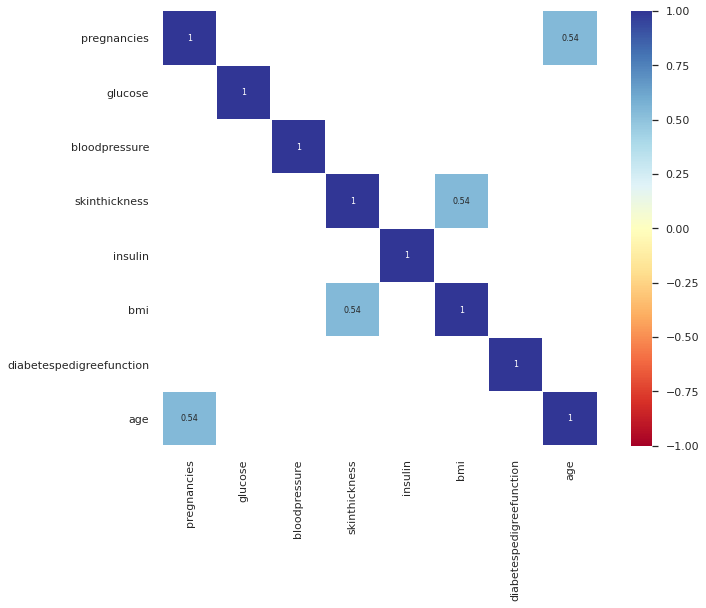

In [45]:
corr = df.drop(['outcome'], axis=1).corr() # correlations
plt.figure(figsize=((12,8)))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='RdYlBu', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

In [46]:
##### It does not look like there is a significant correlation between our predictors #####
#### Pregnancies and age & skinthickness with bmi have a corr coefficient larger than 0.5

In [47]:
##### Let's plot the indiv correlation of these variables against all the other ind variables.

In [48]:
df.columns

Index(['pregnancies', 'glucose', 'bloodpressure', 'skinthickness', 'insulin',
       'bmi', 'diabetespedigreefunction', 'age', 'outcome'],
      dtype='object')

Joint plot of Glucose with Other Variables ==> 

Correlation between pregnancies and glucose ==>  0.12791147208431844


<Figure size 500x400 with 0 Axes>

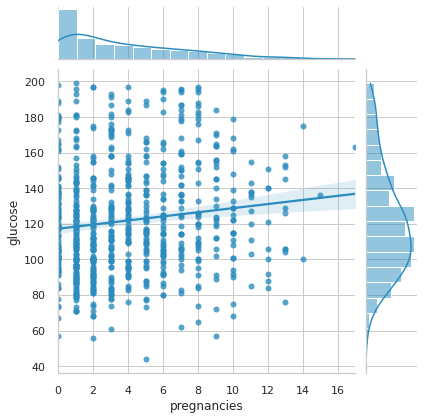

Correlation between pregnancies and bloodpressure ==>  0.20852230877900207


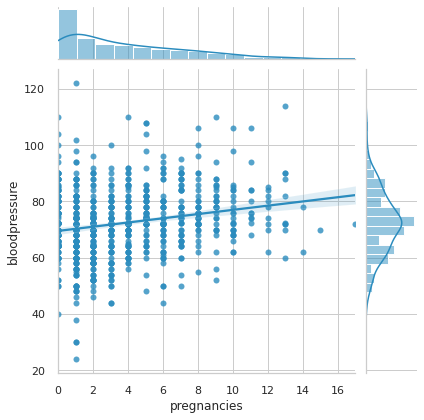

Correlation between pregnancies and skinthickness ==>  0.08176982300694918


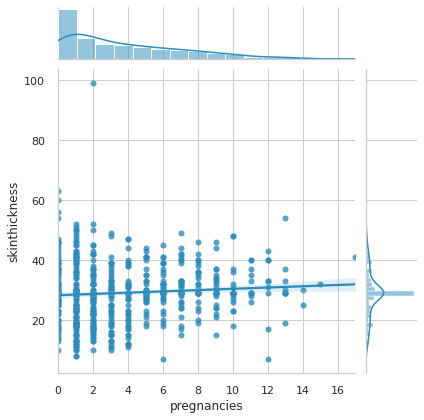

Correlation between pregnancies and insulin ==>  0.025047480864533175


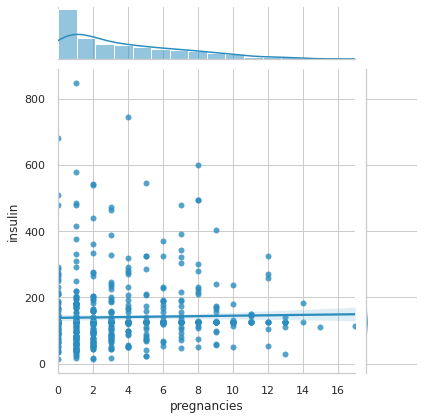

Correlation between pregnancies and bmi ==>  0.0215587287096652


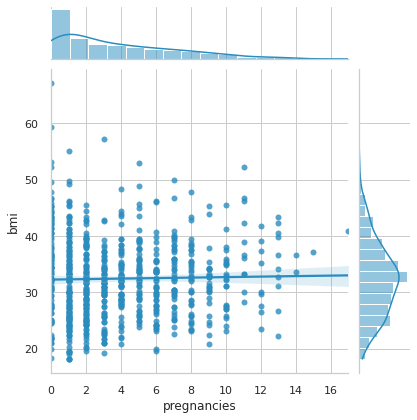

Correlation between pregnancies and diabetespedigreefunction ==>  -0.03352267296261304


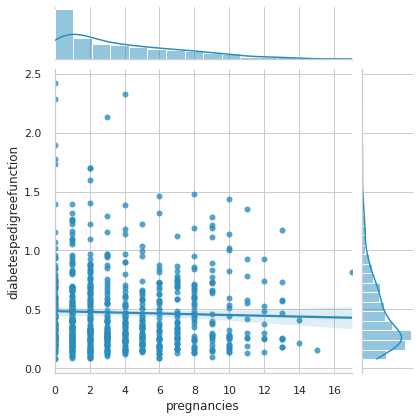

Correlation between pregnancies and age ==>  0.5443412284023392


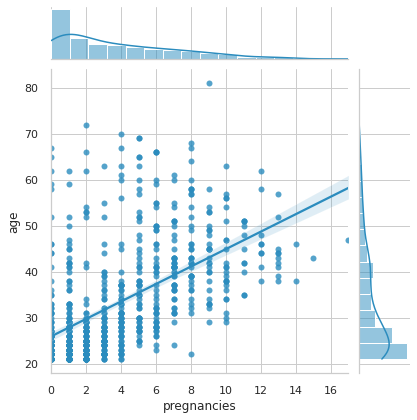

In [49]:
plt.figure(dpi = 100, figsize = (5,4))
print("Joint plot of Glucose with Other Variables ==> \n")
for i in  df.columns:
    if i != 'pregnancies' and i != 'outcome':
        print(f"Correlation between pregnancies and {i} ==> ",df.corr().loc['pregnancies'][i])
        sns.jointplot(x='pregnancies',y=i,data=df,kind = 'reg',color = "#2b8cbe")
        plt.show()

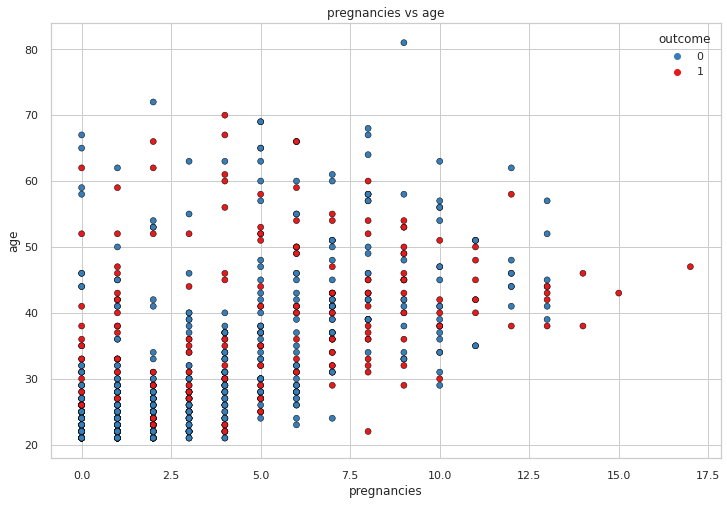

In [50]:
palette ={0 : '#377eb8', 1 : '#e41a1c'}

edgecolor = 'black'

fig = plt.figure(figsize=(12,8))

ax1 = sns.scatterplot(x = df['pregnancies'], y = df['age'], hue = "outcome",
                    data = df, palette = palette, edgecolor=edgecolor)

# # plt.annotate('N6', size=25, color='black', xy=(20, 20), xytext=(50, 25),
# #             arrowprops=dict(facecolor='black', shrink=0.05),
#             )
# plt.plot([0, 20], [30, 30], linewidth=2, color = 'red')
# plt.plot([0, 0], [16, 30], linewidth=2, color = 'red')
# plt.plot([0, 20], [16, 16], linewidth=2, color = 'red')
# plt.plot([20, 20], [16, 30], linewidth=2, color = 'red')
plt.title('pregnancies vs age')
plt.show()

Joint plot of Glucose with Other Variables ==> 

Correlation between skinthickness and pregnancies ==>  0.08176982300694918


<Figure size 500x400 with 0 Axes>

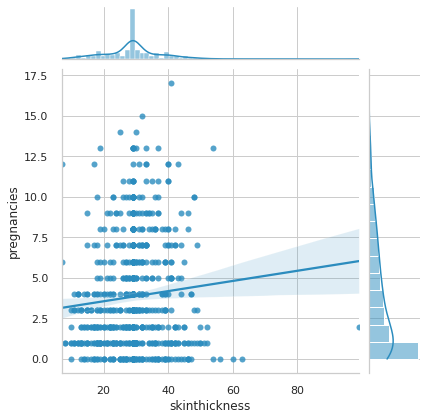

Correlation between skinthickness and glucose ==>  0.19268585591450346


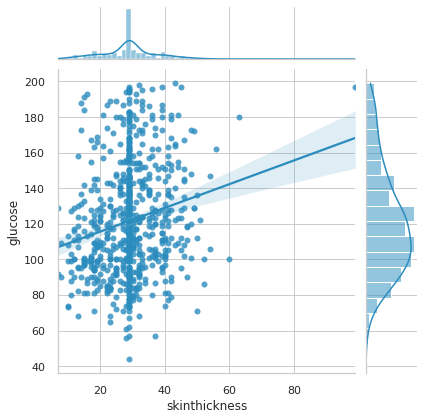

Correlation between skinthickness and bloodpressure ==>  0.1918534479739443


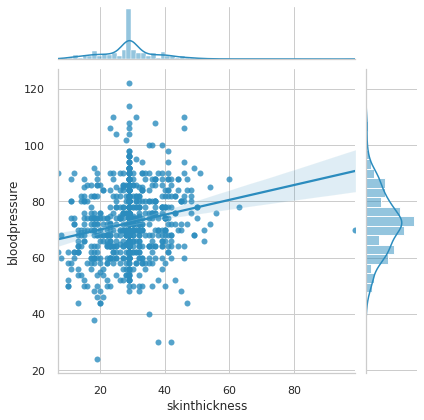

Correlation between skinthickness and insulin ==>  0.15561028255915096


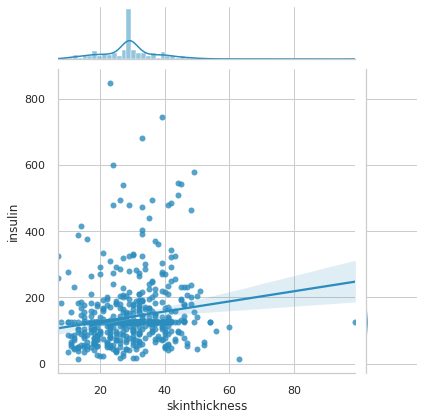

Correlation between skinthickness and bmi ==>  0.5432050699718665


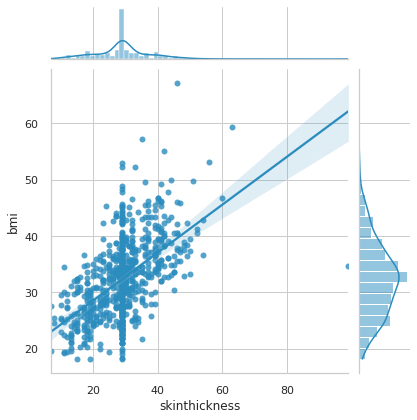

Correlation between skinthickness and diabetespedigreefunction ==>  0.10218826726571294


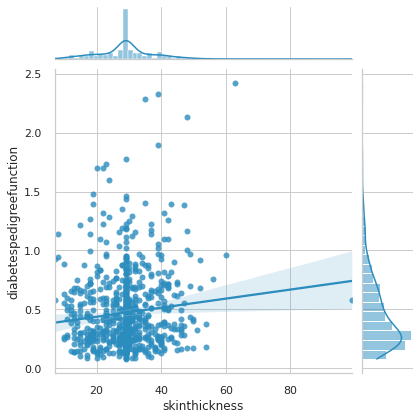

Correlation between skinthickness and age ==>  0.12610718967353202


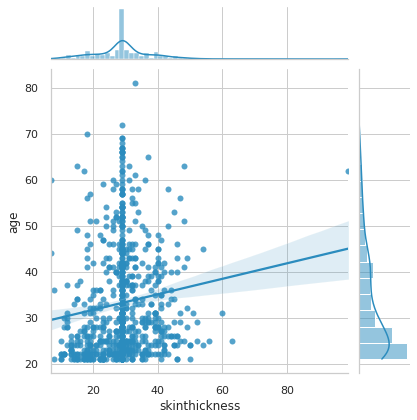

In [51]:
plt.figure(dpi = 100, figsize = (5,4))
print("Joint plot of Glucose with Other Variables ==> \n")
for i in  df.columns:
    if i !=  'skinthickness' and i != 'outcome':
        print(f"Correlation between skinthickness and {i} ==> ",df.corr().loc['skinthickness'][i])
        sns.jointplot(x='skinthickness',y=i,data=df,kind = 'reg',color = "#2b8cbe")
        plt.show()

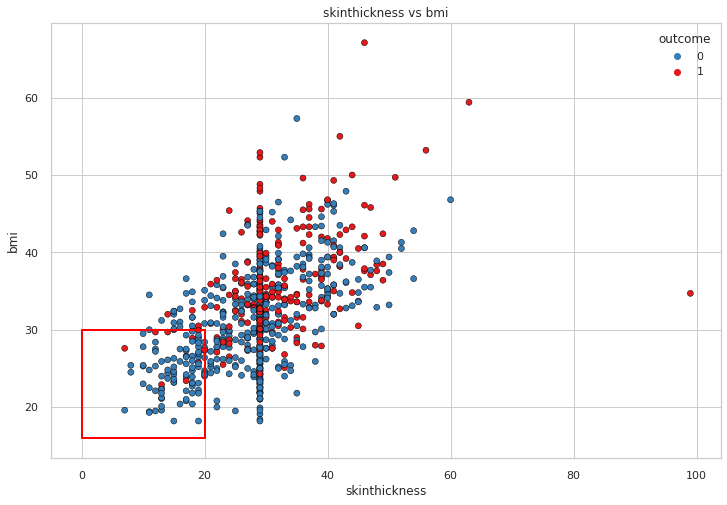

In [52]:
palette ={0 : '#377eb8', 1 : '#e41a1c'}

edgecolor = 'black'

fig = plt.figure(figsize=(12,8))

ax1 = sns.scatterplot(x = df['skinthickness'], y = df['bmi'], hue = "outcome",
                    data = df, palette = palette, edgecolor=edgecolor)

# # plt.annotate('N6', size=25, color='black', xy=(20, 20), xytext=(50, 25),
# #             arrowprops=dict(facecolor='black', shrink=0.05),
#             )
plt.plot([0, 20], [30, 30], linewidth=2, color = 'red')
plt.plot([0, 0], [16, 30], linewidth=2, color = 'red')
plt.plot([0, 20], [16, 16], linewidth=2, color = 'red')
plt.plot([20, 20], [16, 30], linewidth=2, color = 'red')
plt.title('skinthickness vs bmi')
plt.show()

##### we observe that there is less chance of of positive outcome among people with 
##### low bmi and low skinthickness

###### Multivariable exploration #####

In [54]:
df.columns

Index(['pregnancies', 'glucose', 'bloodpressure', 'skinthickness', 'insulin',
       'bmi', 'diabetespedigreefunction', 'age', 'outcome'],
      dtype='object')

<Figure size 960x660 with 0 Axes>

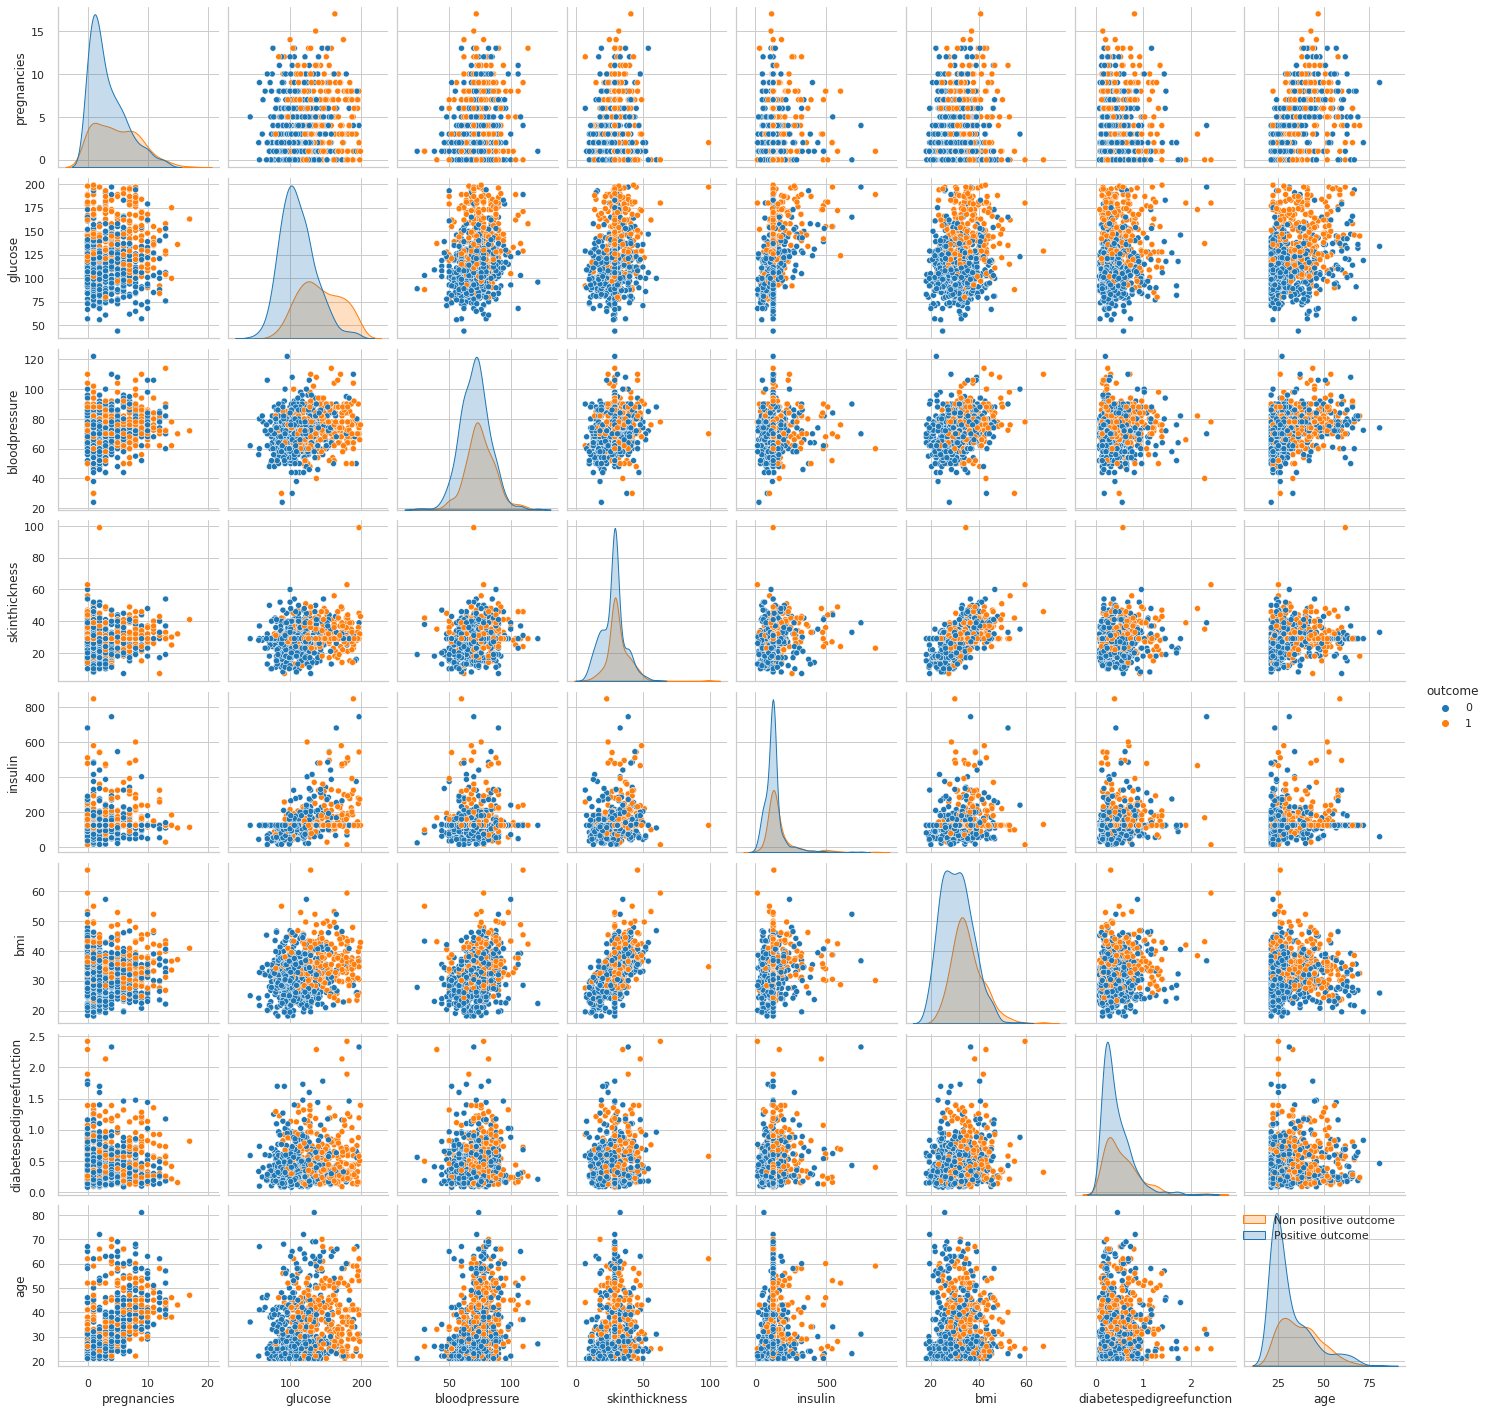

In [55]:
sns.set(style="whitegrid") 

plt.figure(dpi = 120)

sns.pairplot(df,hue = 'outcome',palette = 'tab10')

plt.legend(['Non positive outcome','Positive outcome'])

plt.show()

In [56]:
##### from the plot above it looks like younger people have a less possitive outcome

In [57]:
df.columns

Index(['pregnancies', 'glucose', 'bloodpressure', 'skinthickness', 'insulin',
       'bmi', 'diabetespedigreefunction', 'age', 'outcome'],
      dtype='object')

In [58]:
df['age'].groupby(df['outcome']).mean()

outcome
0    31.190000
1    37.067164
Name: age, dtype: float64

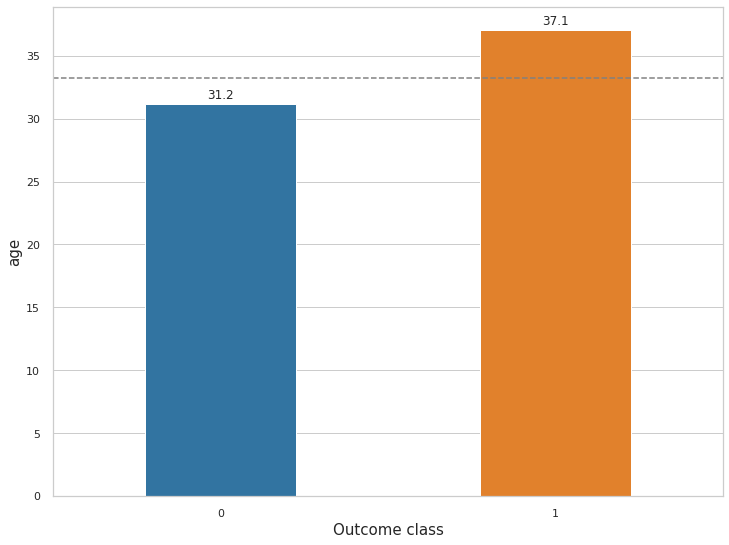

In [59]:
color_labels = df['outcome'].unique()

# List of color palette to use
rgb_values = sns.color_palette("tab10", 2)

# Map label to color palette

color_map = dict(zip(color_labels, rgb_values))

# plt.figure(figsize=(12,9))


col_series = df['age'].groupby(df['outcome']).mean()

plt.figure(figsize=(12,9))

splot = sns.barplot(x=[index for index,value in col_series.items()],
            y=[value for index,value in col_series.items()],
            data=df, 
            palette=df['outcome'].map(color_map))
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
    
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

change_width(splot, .45)

#plt.title('Average ltv (by default class)', fontsize = 18, pad = 12)
plt.xlabel("Outcome class", fontsize = 15)
plt.axhline(y=df['age'].mean(), color='gray', 
            linestyle='dashed', label="age Average")
plt.ylabel("age",fontsize = 15);


In [60]:
import plotly.express as px
import plotly.graph_objects as go

##### Age andd Outcome
fig2 = px.box(df, x = df['age'], color = 'outcome',  color_discrete_sequence=["red", "blue"],
              template="plotly_white")
fig2.show()

In [61]:
##### split in train and test and then trasnform 

In [69]:
df.columns

Index(['pregnancies', 'glucose', 'bloodpressure', 'skinthickness', 'insulin',
       'bmi', 'diabetespedigreefunction', 'age', 'outcome'],
      dtype='object')

##### Data transformation #####

In [70]:
#### We need to perform Feature scaling in order to normalize the range of independent variables befor
#### we feed into our neural nextwork 
#### NN uses gradient descent, then the difference in ranges of features will cause different step sizes for each feature. 

In [71]:
df.columns

Index(['pregnancies', 'glucose', 'bloodpressure', 'skinthickness', 'insulin',
       'bmi', 'diabetespedigreefunction', 'age', 'outcome'],
      dtype='object')

In [72]:
import time
start_time = time.time()

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(df.drop(["outcome"],axis = 1),),
        columns=['pregnancies', 'glucose', 'bloodpressure', 'skinthickness', 'insulin',
       'bmi', 'diabetespedigreefunction', 'age'])


print("--- %s seconds ---" % (time.time() - start_time))    

--- 0.0073397159576416016 seconds ---


In [73]:
from pandas import option_context

with option_context('display.max_rows', None,'display.max_colwidth',50,'display.max_columns',50):
        display(X.head(5))

pregnancies   glucose  bloodpressure  skinthickness   insulin       bmi  \
0     0.639947  0.865108      -0.033518       0.670643 -0.181541  0.166619   
1    -0.844885 -1.206162      -0.529859      -0.012301 -0.181541 -0.852200   
2     1.233880  2.015813      -0.695306      -0.012301 -0.181541 -1.332500   
3    -0.844885 -1.074652      -0.529859      -0.695245 -0.540642 -0.633881   
4    -1.141852  0.503458      -2.680669       0.670643  0.316566  1.549303   

   diabetespedigreefunction       age  
0                  0.468492  1.425995  
1                 -0.365061 -0.190672  
2                  0.604397 -0.105584  
3                 -0.920763 -1.041549  
4                  5.484909 -0.020496

In [74]:
y = df['outcome']

##### train test split #####

In [75]:

#### there is some balance in our outcome target

In [76]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=101, stratify=y)

In [77]:
print(X_train.shape)

print('------------')


print(X_test.shape)

print('------------')

print(y_train.shape)

print('------------')

print(y_test.shape)

(576, 8)
------------
(192, 8)
------------
(576,)
------------
(192,)


In [78]:
from pandas import option_context

with option_context('display.max_rows', None,'display.max_colwidth',50,'display.max_columns',50):
        display(X_train.head(2))

pregnancies   glucose  bloodpressure  skinthickness   insulin       bmi  \
590     2.124780 -0.351352       0.959163       1.239762 -0.181541  2.087821   
695     0.936914  0.667844       1.455504      -0.581421  3.930739 -0.299127   

     diabetespedigreefunction       age  
590                  1.368487  1.000557  
695                 -1.038547  0.830381

In [79]:
from pandas import option_context

with option_context('display.max_rows', None,'display.max_colwidth',50,'display.max_columns',50):
        display(y_train.head(3))

590    1
695    1
741    0
Name: outcome, dtype: int64

In [80]:
#### Baseline model ######

In [81]:
import tensorflow as tf

In [82]:
from tensorflow import keras
from tensorflow.keras import layers

print(keras.__version__)

2.4.0


In [83]:
from tensorflow import keras
from tensorflow.keras import backend as k
from tensorflow.keras.layers import *
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Input, LSTM, Embedding, Dropout, SpatialDropout1D, Activation
from tensorflow.keras.models import *
from tensorflow.keras import callbacks
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.layers import Dense, Embedding, GlobalMaxPool1D, Dropout, Conv1D,LSTM, Flatten
from tensorflow.keras import optimizers
from tensorflow.keras.metrics import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.utils import plot_model
from sklearn.metrics import *

In [84]:
X_train.shape[1]

8

In [78]:
##### 8 input dimensions ###
#### simple model ###

In [77]:
with tf.device("gpu:1"):
   print("tf.keras code in this scope will run on GPU")
# define model architecture
k.clear_session()
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary() #summary) of model

tf.keras code in this scope will run on GPU
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Extension horovod.torch has not been built: /home/ec2-user/anaconda3/envs/tensorflow2_latest_p37/lib/python3.7/site-packages/horovod/torch/mpi_lib/_mpi_lib.cpython-37m-x86_64-linux-gnu.so not found
If this is not expected, reinstall Horovod with HOROVOD_WITH_PYTORCH=1 to debug the build error.
Warning! MPI libs are missing, but python applications are still avaiable.
[2021-09-27 17:48:31.057 ip-172-16-94-100.ec2.internal:16402 INFO utils.py:27] RULE_JOB_STO

#### Total params: 121

In [91]:
METRICS = [
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc')
]

Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/repli

In [79]:
with tf.device("gpu:1"):
   print("tf.keras code in this scope will run on GPU")

# compile model
model.compile(tf.keras.optimizers.RMSprop(
    learning_rate=.001),loss='binary_crossentropy', metrics=METRICS)

tf.keras code in this scope will run on GPU
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0


In [80]:
with tf.device("gpu:1"):
   print("tf.keras code in this scope will run on GPU")
callbacks = [ModelCheckpoint(filepath='model-baseline-DAAN-570.h5', save_best_only=True,verbose=1,
                             monitor='val_loss',
    mode='min')
            ]

tf.keras code in this scope will run on GPU


In [81]:
with tf.device("gpu:1"):
   print("tf.keras code in this scope will run on GPU")

#### train model
history = model.fit(X_train, y_train,
                    epochs=20,
                    batch_size=128,
                    validation_split=0.1,
                    callbacks=callbacks)

tf.keras code in this scope will run on GPU
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDatasetV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ReadVariableOp in device /job:localhost/re

In [93]:
##### plot losses

In [82]:
df.shape

(768, 9)

In [83]:
pd.DataFrame(model.history.history)

loss  accuracy  precision    recall       auc  val_loss  val_accuracy  \
0   0.721350  0.436293   0.335196  0.689655  0.534124  0.681686      0.551724   
1   0.702912  0.467181   0.346386  0.660920  0.569016  0.671258      0.568965   
2   0.691629  0.513514   0.374194  0.666667  0.600107  0.663181      0.568965   
3   0.682619  0.540541   0.391156  0.660920  0.624231  0.656418      0.603448   
4   0.674454  0.563707   0.408451  0.666667  0.645566  0.650063      0.637931   
5   0.665628  0.594595   0.432331  0.660920  0.659566  0.643412      0.655172   
6   0.656872  0.623552   0.458167  0.660920  0.676682  0.637211      0.689655   
7   0.647772  0.652510   0.486957  0.643678  0.691543  0.630680      0.724138   
8   0.639967  0.667954   0.504505  0.643678  0.703956  0.624474      0.741379   
9   0.632347  0.683398   0.523585  0.637931  0.718942  0.617948      0.724138   
10  0.623915  0.691120   0.535354  0.609195  0.729384  0.611566      0.741379   
11  0.615844  0.689189   0.533333  0.597701  0.738832  0.606200      0.741379   
12  0.609747  0.706564   0.559783  0.591954  0.748881  0.599858      0.724138   
13  0.602986  0.710425   0.565934  0.591954  0.758019  0.596383      0.724138   
14  0.596868  0.704633   0.560000  0.563218  0.762313  0.590382      0.741379   
15  0.590768  0.725869   0.595238  0.574713  0.769764  0.585475      0.741379   
16  0.584550  0.729730   0.603659  0.568965  0.776764  0.581947      0.724138   
17  0.578632  0.733591   0.611111  0.568965  0.780557  0.578813      0.724138   
18  0.574196  0.735521   0.616352  0.563218  0.783906  0.573610      0.724138   
19  0.567388  0.741313   0.628205  0.563218  0.789027  0.570427      0.724138   

    val_precision  val_recall   val_auc  
0        0.512821    0.740741  0.612306  
1        0.525000    0.777778  0.648148  
2        0.525000    0.777778  0.667861  
3        0.552632    0.777778  0.689367  
4        0.583333    0.777778  0.709677  
5        0.600000    0.777778  0.721027  
6        0.645161    0.740741  0.741935  
7        0.689655    0.740741  0.763441  
8        0.700000    0.777778  0.777180  
9        0.703704    0.703704  0.789128  
10       0.730769    0.703704  0.796894  
11       0.730769    0.703704  0.803465  
12       0.720000    0.666667  0.810633  
13       0.720000    0.666667  0.813620  
14       0.750000    0.666667  0.823178  
15       0.750000    0.666667  0.826165  
16       0.761905    0.592593  0.830346  
17       0.761905    0.592593  0.834528  
18       0.761905    0.592593  0.835125  
19       0.789474    0.555556  0.833931

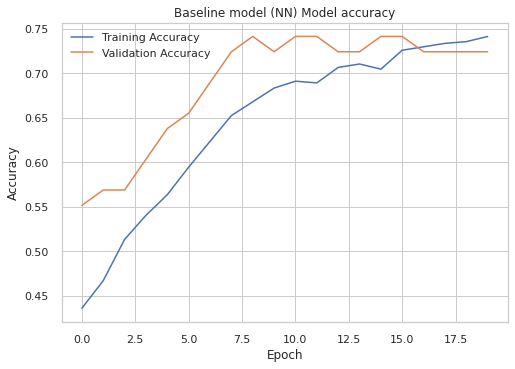

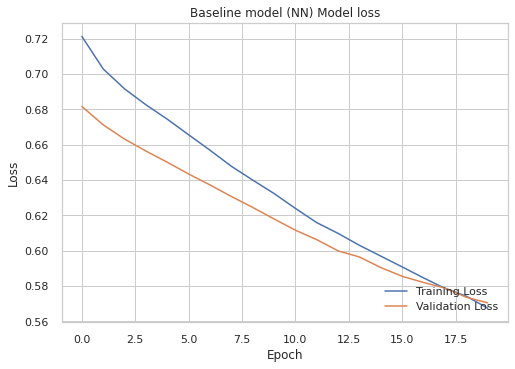

In [84]:
#### Plot training & validation accuracy values
figsize = (25, 12)
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('Baseline model (NN) Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='upper left')
plt.show()

#### Plot training & validation loss values
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Baseline model (NN) Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Validation Loss'], loc='lower right')
plt.show()

##### The training and validation loss where decreasing are the number of epochs were increasing
##### Basic model did not overfit our small dataset
#### Validation acc started to decreased after 15 epochs

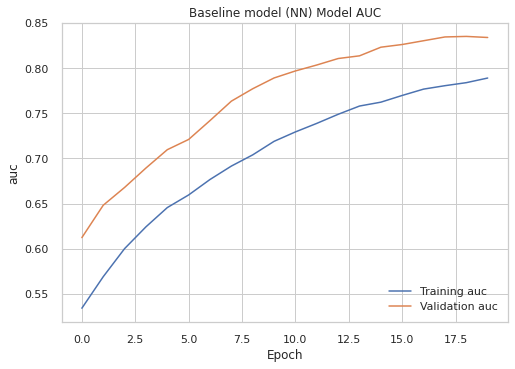

In [92]:
#### Plot training & validation loss values
plt.plot(model.history.history['auc'])
plt.plot(model.history.history['val_auc'])
plt.title('Baseline model (NN) Model AUC')
plt.ylabel('auc')
plt.xlabel('Epoch')
plt.legend(['Training auc', 'Validation auc'], loc='lower right')
plt.show()

##### The training and validation AUC scores where increasing are the number of epochs were decreasing

In [86]:
##### Load best model to make predictions on test set #####

In [162]:
model_best_baseline =keras.models.load_model('model-baseline-DAAN-570.h5')

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op RandomUniform in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Sub in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mul in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Add in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost

In [163]:
model_best_baseline.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                108       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 13        
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [164]:
print('Classification report:\n\n',classification_report(y_test, model_best_baseline.predict_classes(X_test)))

Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDatasetV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Ide

In [165]:
roc_auc_score(y_test, model_best_baseline.predict_classes(X_test))

Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDatasetV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op M

0.6782686567164178

In [166]:
from sklearn.metrics import f1_score

# calculate F1 score
f1_score(y_test, model_best_baseline.predict_classes(X_test),average='weighted')

Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDatasetV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op M

0.7235336838567176

Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDatasetV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op M

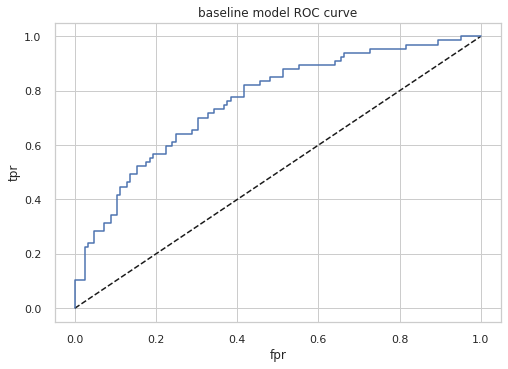

In [167]:
from sklearn.metrics import roc_curve
y_pred_proba = model_best_baseline.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='baseline Sequential model')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('baseline model ROC curve')
plt.show()

##### Our baseline model achieved the following results in our test set:

##### f1_score  = 0.7218

##### roc_auc_score = 0 .67826

##### accuracy =   0.7343

##### The training and validation loss where decreasing are the number of epochs were increasing

##### In terms of training time I was able to set up a GPU training strategy,
##### so because of this and the data size and data types the model ran extremely fast ######

##### It does not look our model overfit our the data, the only issue is that it perform better for the 
#####  class with the larger number of examples.
##### The negative outcome class 
##### maybe adding class weight strategy could help our simple arch. 

## Part 2: Find the Best Model

#### Usingkeras_tuner for HPO: hyper-parameter optimizations
#### using RandomSearch strategy over number of layers, hidden unites and learning rate
#### change the optimizer to adam

In [86]:
from keras_tuner import HyperParameters
from keras_tuner import RandomSearch


In [92]:
def model_builder(hp):
    with tf.device("gpu:1"):
        print("tf.keras code in this scope will run on GPU")
    k.clear_session()
    model = keras.Sequential()
    for i in range(hp.Int("num_layers", 2, 20)):
        model.add(Dense(
                units=hp.Int("units_" + str(i), min_value=32, max_value=512, step=16),
                activation="relu",
            )
                 )
        
    model.add(Dense(1, activation='sigmoid'))
  # Tune the learning rate for the optimizer
  # Choose an optimal value from 0.01, 0.001, or 0.0001
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-1,1e-2, 1e-3, 1e-4,1e-5])
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                loss='binary_crossentropy', metrics=METRICS)
    return model

In [93]:

tuner_daan570 = RandomSearch(
    model_builder,
    objective="val_accuracy",
    max_trials=5,
    executions_per_trial=2,
)




tf.keras code in this scope will run on GPU
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:

In [94]:
tuner_daan570.search_space_summary()

Search space summary
Default search space size: 4
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 20, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 16, 'sampling': None}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 16, 'sampling': None}
learning_rate (Choice)
{'default': 0.1, 'conditions': [], 'values': [0.1, 0.01, 0.001, 0.0001, 1e-05], 'ordered': True}


In [95]:
import time

start_time = time.time()

tuner_daan570.search(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

print("--- %s seconds ---" % (time.time() - start_time))

Trial 5 Complete [00h 00m 10s]
val_accuracy: 0.7083333432674408

Best val_accuracy So Far: 0.7526041567325592
Total elapsed time: 00h 01m 17s
INFO:tensorflow:Oracle triggered exit
--- 77.60783839225769 seconds ---


##### Best val_accuracy So Far: 0.7526041567325592
##### for our HPO
##### Best results with num_layers: 16
##### and learning_rate: 0.0001

In [98]:
tuner_daan570.results_summary()

Results summary
Results in ./untitled_project
Showing 10 best trials
Objective(name='val_accuracy', direction='max')
Trial summary
Hyperparameters:
num_layers: 16
units_0: 80
units_1: 464
learning_rate: 0.0001
units_2: 384
units_3: 208
units_4: 160
units_5: 80
units_6: 64
units_7: 64
units_8: 320
units_9: 192
units_10: 64
units_11: 336
units_12: 240
units_13: 448
units_14: 416
units_15: 480
units_16: 256
Score: 0.7526041567325592
Trial summary
Hyperparameters:
num_layers: 20
units_0: 496
units_1: 384
learning_rate: 0.01
units_2: 384
units_3: 192
units_4: 384
units_5: 208
units_6: 48
units_7: 368
units_8: 64
units_9: 320
units_10: 80
units_11: 432
units_12: 32
units_13: 304
units_14: 208
units_15: 480
units_16: 176
units_17: 32
units_18: 32
units_19: 32
Score: 0.7083333432674408
Trial summary
Hyperparameters:
num_layers: 11
units_0: 464
units_1: 352
learning_rate: 0.1
units_2: 368
units_3: 144
units_4: 272
units_5: 80
units_6: 240
units_7: 480
units_8: 384
units_9: 128
units_10: 384
uni

In [109]:
best_model = tuner_daan570.get_best_models(num_models=1)[0]

tf.keras code in this scope will run on GPU
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:

In [112]:
best_model.evaluate(X_test, y_test)
# accuracy_score(y_test, model_best.predict_classes(X_test))

Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDatasetV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Ide

[0.5483425259590149,
 0.703125,
 0.6612903475761414,
 0.305970162153244,
 0.6855372786521912]

##### Fit best TUNED model to our dataset #####

In [114]:
with tf.device("gpu:1"):
   print("tf.keras code in this scope will run on GPU")
callbacks = [ModelCheckpoint(filepath='model-best-DAAN-570.h5', save_best_only=True,verbose=1,
                             monitor='val_loss',
    mode='min')
            ]

tf.keras code in this scope will run on GPU


In [117]:
with tf.device("gpu:1"):
   print("tf.keras code in this scope will run on GPU")

#### train model
history =best_model.fit(X_train, y_train,
                    epochs=100,
                    batch_size=128,
                    validation_data= (X_test, y_test),
                    callbacks=callbacks)

tf.keras code in this scope will run on GPU
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDatasetV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/

In [126]:
best_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 80)                720       
_________________________________________________________________
dense_1 (Dense)              (None, 464)               37584     
_________________________________________________________________
dense_2 (Dense)              (None, 384)               178560    
_________________________________________________________________
dense_3 (Dense)              (None, 208)               80080     
_________________________________________________________________
dense_4 (Dense)              (None, 160)               33440     
_________________________________________________________________
dense_5 (Dense)              (None, 80)                12880     
_________________________________________________________________
dense_6 (Dense)              (None, 64)                5

##### Total params: 1,045,505

In [120]:
pd.DataFrame(best_model.history.history)

loss  accuracy  precision    recall       auc  val_loss  val_accuracy  \
0   0.240922  0.902778   0.805907  0.950249  0.960517  0.745637      0.734375   
1   0.227396  0.906250   0.800000  0.975124  0.967224  0.837654      0.744792   
2   0.212241  0.911458   0.817797  0.960199  0.970726  0.789414      0.739583   
3   0.197962  0.920139   0.827004  0.975124  0.973234  0.873953      0.739583   
4   0.184148  0.932292   0.840336  0.995025  0.975436  0.946599      0.739583   
..       ...       ...        ...       ...       ...       ...           ...   
95  0.000053  1.000000   1.000000  1.000000  1.000000  3.934439      0.739583   
96  0.000051  1.000000   1.000000  1.000000  1.000000  3.950329      0.739583   
97  0.000049  1.000000   1.000000  1.000000  1.000000  3.966051      0.739583   
98  0.000048  1.000000   1.000000  1.000000  1.000000  3.982834      0.739583   
99  0.000046  1.000000   1.000000  1.000000  1.000000  3.999066      0.739583   

    val_precision  val_recall   val_auc  
0        0.605263    0.686567  0.787642  
1        0.655172    0.567164  0.786209  
2        0.623188    0.641791  0.777194  
3        0.639344    0.582090  0.773075  
4        0.634921    0.597015  0.768716  
..            ...         ...       ...  
95       0.654545    0.537313  0.685134  
96       0.654545    0.537313  0.685134  
97       0.654545    0.537313  0.685134  
98       0.654545    0.537313  0.685134  
99       0.654545    0.537313  0.685134  

[100 rows x 10 columns]

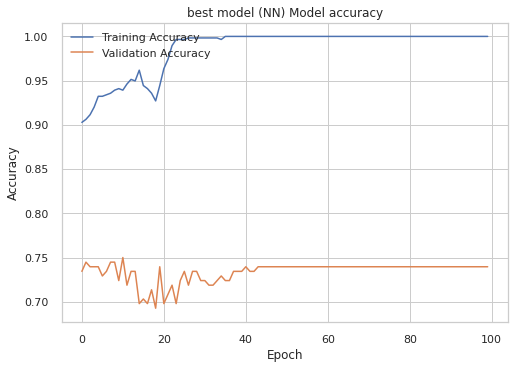

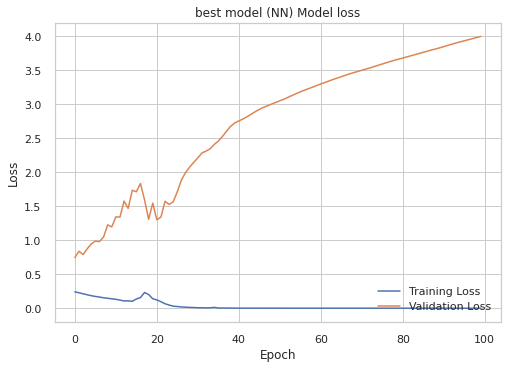

In [121]:
#### Plot training & validation accuracy values
figsize = (25, 12)
plt.plot(best_model.history.history['accuracy'])
plt.plot(best_model.history.history['val_accuracy'])
plt.title('Large tuned best model (NN) Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='upper left')
plt.show()

#### Plot training & validation loss values
plt.plot(best_model.history.history['loss'])
plt.plot(best_model.history.history['val_loss'])
plt.title('Large tuned best model (NN) Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Validation Loss'], loc='lower right')
plt.show()

##### The training and validation loss start increasing as the number of epochs were increasing
##### These indicates overfitting of the model
##### This large architecture with 16 num_layers overfitted our small dataset.
##### This model have more than 1 mm parameters and only increased our test accuracy by 1 point.

In [125]:
print('Accuracy of our model is: ', accuracy_score(y_test, best_model.predict_classes(X_test)))

Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDatasetV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op M

In [124]:
print('Classification report:\n\n',classification_report(y_test, best_model.predict_classes(X_test)))

Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDatasetV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Ide

#### Through hypertuning we found an architecture with more than 1 Million
#### parameters than our baseline model that performs slightly (1%) better on the test set.
#### If we performed more iterations of the HPO , we’d most likely find an even better performing architecture.
#### Let's reduce the batch size and number of hideen nodes.

##### New model ######

In [131]:
with tf.device("gpu:1"):
   print("tf.keras code in this scope will run on GPU")
# define model architecture
k.clear_session()
model = Sequential()
model.add(Dense(76, input_dim=8, activation = "relu"))
model.add(Dense(72, activation = "relu"))
model.add(Dense(72, activation = "relu"))
model.add(Dense(1, activation='sigmoid'))
model.summary() #summary) of model

tf.keras code in this scope will run on GPU
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op RandomUniform in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Sub in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mul in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Add in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:

In [132]:
METRICS = [
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc')
]

Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/repli

In [133]:
with tf.device("gpu:1"):
   print("tf.keras code in this scope will run on GPU")

# compile model
model.compile(tf.keras.optimizers.Adam(
    learning_rate=0.0017996162392571403),loss='binary_crossentropy', metrics=METRICS)

tf.keras code in this scope will run on GPU
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0


In [134]:
with tf.device("gpu:1"):
   print("tf.keras code in this scope will run on GPU")
callbacks = [ModelCheckpoint(filepath='model-best2-DAAN-570.h5', save_best_only=True,verbose=1,
                             monitor='val_loss',
    mode='min')
            ]

tf.keras code in this scope will run on GPU


In [135]:
with tf.device("gpu:1"):
   print("tf.keras code in this scope will run on GPU")

#### train model
history = model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=48,
                   validation_data= (X_test, y_test),
                    callbacks=callbacks)

tf.keras code in this scope will run on GPU
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDatasetV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ReadVariableOp in device /job:localhost/re

In [136]:
pd.DataFrame(model.history.history)

loss  accuracy  precision    recall       auc  val_loss  val_accuracy  \
0   0.620843  0.605903   0.367347  0.179104  0.659065  0.554112      0.682292   
1   0.492221  0.743056   0.757282  0.388060  0.839144  0.526031      0.734375   
2   0.439472  0.788194   0.711230  0.661692  0.857406  0.518127      0.750000   
3   0.419500  0.793403   0.709184  0.691542  0.872557  0.515368      0.755208   
4   0.406798  0.802083   0.763636  0.626866  0.884418  0.503484      0.765625   
5   0.394891  0.807292   0.734375  0.701493  0.890395  0.519331      0.750000   
6   0.384838  0.815972   0.746114  0.716418  0.894839  0.532539      0.765625   
7   0.370978  0.831597   0.765306  0.746269  0.903357  0.548703      0.744792   
8   0.360415  0.833333   0.777778  0.731343  0.911284  0.532455      0.760417   
9   0.349186  0.840278   0.782383  0.751244  0.916716  0.556352      0.744792   
10  0.346671  0.831597   0.785714  0.711443  0.917479  0.556106      0.750000   
11  0.336040  0.835069   0.770408  0.751244  0.922381  0.565485      0.739583   
12  0.329143  0.850694   0.769953  0.815920  0.927595  0.628249      0.739583   
13  0.321095  0.854167   0.803109  0.771144  0.930905  0.575361      0.739583   
14  0.309315  0.861111   0.816754  0.776119  0.935708  0.582060      0.729167   
15  0.299037  0.862847   0.801980  0.805970  0.940769  0.640530      0.734375   
16  0.288608  0.869792   0.818182  0.805970  0.943370  0.595966      0.744792   
17  0.285255  0.883681   0.841837  0.820895  0.947138  0.615143      0.734375   
18  0.268744  0.881944   0.821256  0.845771  0.952186  0.659807      0.734375   
19  0.259696  0.880208   0.814286  0.850746  0.957665  0.651048      0.739583   
20  0.249275  0.880208   0.830000  0.825871  0.958216  0.639557      0.739583   
21  0.231164  0.901042   0.839623  0.885572  0.967874  0.708167      0.729167   
22  0.223183  0.895833   0.840580  0.865672  0.968637  0.723431      0.750000   
23  0.211867  0.907986   0.855769  0.885572  0.973313  0.741178      0.739583   
24  0.201656  0.902778   0.850242  0.875622  0.975987  0.711788      0.729167   
25  0.194369  0.913194   0.875622  0.875622  0.978799  0.741010      0.723958   
26  0.197017  0.907986   0.859223  0.880597  0.975768  0.750717      0.713542   
27  0.168018  0.930556   0.885167  0.920398  0.986461  0.935063      0.723958   
28  0.172588  0.937500   0.906404  0.915423  0.983642  0.787089      0.718750   
29  0.154501  0.935764   0.898058  0.920398  0.988604  0.854534      0.739583   
30  0.142600  0.939236   0.915000  0.910448  0.989499  0.879475      0.697917   
31  0.153809  0.940972   0.919598  0.910448  0.986507  1.028569      0.723958   
32  0.156620  0.934028   0.909548  0.900497  0.984325  0.889761      0.703125   
33  0.137319  0.946181   0.916667  0.930348  0.990335  1.023357      0.718750   
34  0.118090  0.953125   0.930693  0.935323  0.994401  0.963418      0.682292   
35  0.115849  0.954861   0.931035  0.940298  0.993181  0.993026      0.692708   
36  0.105739  0.960069   0.945000  0.940298  0.996073  1.027561      0.708333   
37  0.095772  0.967014   0.941748  0.965174  0.996590  1.092072      0.687500   
38  0.089773  0.975694   0.951691  0.980099  0.997678  1.159931      0.703125   
39  0.074797  0.986111   0.975369  0.985075  0.999151  1.155566      0.697917   
40  0.065692  0.984375   0.966019  0.990050  0.999284  1.208851      0.703125   
41  0.063600  0.987847   0.980198  0.985075  0.999383  1.268574      0.692708   
42  0.059716  0.987847   0.970874  0.995025  0.999416  1.294832      0.713542   
43  0.050033  0.987847   0.980198  0.985075  0.999721  1.293332      0.692708   
44  0.046168  0.991319   0.980392  0.995025  0.999874  1.456831      0.692708   
45  0.046654  0.994792   0.995000  0.990050  0.999628  1.348533      0.703125   
46  0.046904  0.991319   0.980392  0.995025  0.999841  1.501597      0.718750   
47  0.043457  0.994792   0.985294  1.000000  0.999682  1.456190      0.692708   
48  0.040214  0.991319   0.985148  0.99

In [96]:
def max_metric():
    max_acc = max(model.history.history['accuracy'])
    
    min_loss = min(model.history.history['loss'])
    max_val_acc = max(model.history.history['val_accuracy'])
    
    min_val_loss = min(model.history.history['val_loss'])
    print(f"Maximum Accuracy: {max_acc} \n Minimum Binary CrossEntropy Loss: {min_loss} \nMaximum Validation Accuracy: {max_val_acc} \nMaximum Validation Binary CrossEntropy Loss: {min_val_loss} \n")

In [161]:
max_metric()

Maximum Accuracy: 1.0 
 Minimum Binary CrossEntropy Loss: 0.03018464893102646 
Maximum Validation Accuracy: 0.765625 
Maximum Validation Binary CrossEntropy Loss: 0.503484308719635 



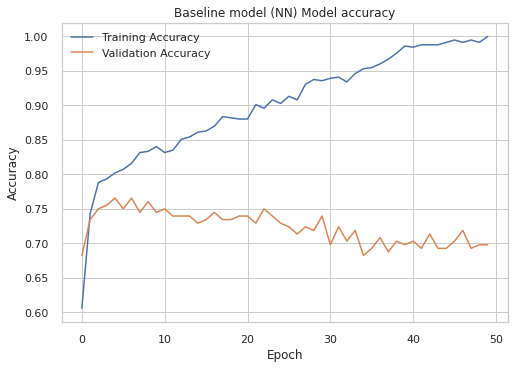

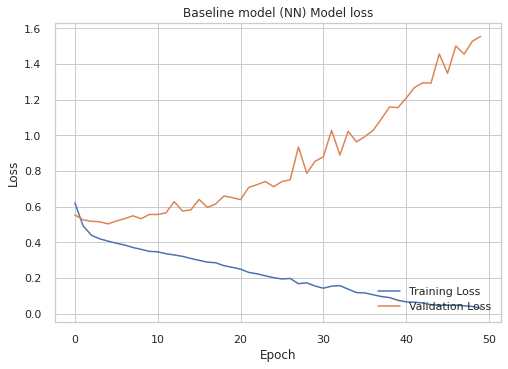

In [137]:
#### Plot training & validation accuracy values
figsize = (25, 12)
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('Baseline model (NN) Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='upper left')
plt.show()

#### Plot training & validation loss values
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Baseline model (NN) Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Validation Loss'], loc='lower right')
plt.show()

##### The training accuracy started to increase as the number of Epoch start increasing
##### val loss start increasing as then number of epochs start increasing it could be network overfitting

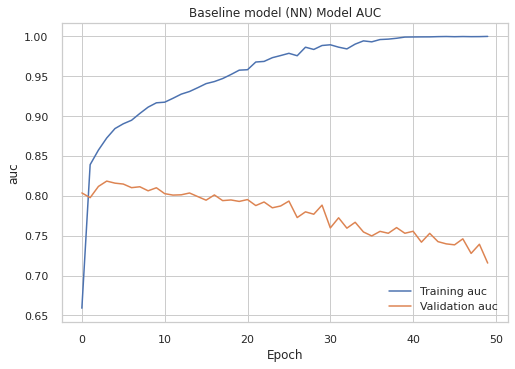

In [140]:
#### Plot training & validation loss values
plt.plot(model.history.history['auc'])
plt.plot(model.history.history['val_auc'])
plt.title('Baseline model (NN) Model AUC')
plt.ylabel('auc')
plt.xlabel('Epoch')
plt.legend(['Training auc', 'Validation auc'], loc='lower right')
plt.show()

In [141]:
model_best2 =keras.models.load_model('model-best2-DAAN-570.h5')

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op RandomUniform in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Sub in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mul in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Add in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost

In [142]:
model_best2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 76)                684       
_________________________________________________________________
dense_1 (Dense)              (None, 72)                5544      
_________________________________________________________________
dense_2 (Dense)              (None, 72)                5256      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 73        
Total params: 11,557
Trainable params: 11,557
Non-trainable params: 0
_________________________________________________________________


#### Total params: 11,557

In [143]:
print('Accuracy of our model is: ', accuracy_score(y_test, model_best2.predict_classes(X_test)))

Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDatasetV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Ide

In [144]:
##### our accuracy increases by 2.7 points with this model


In [148]:
roc_auc_score(y_test, model_best2.predict_classes(X_test))

Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDatasetV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op M

0.7230447761194031

##### Accuracy of our model is:  0.765625
##### roc_auc_score :  0.7230447761194031

In [146]:
print('Classification report:\n\n',classification_report(y_test, model_best2.predict_classes(X_test)))

Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDatasetV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op M

Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDatasetV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op M

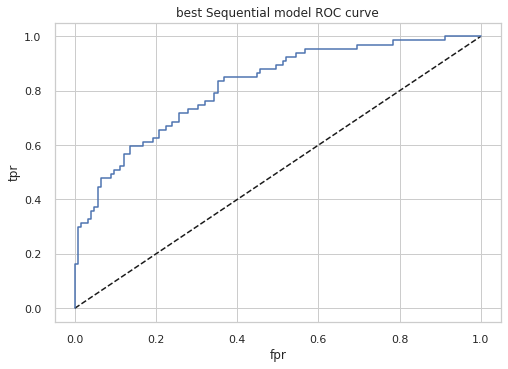

In [150]:
from sklearn.metrics import roc_curve
y_pred_proba = model_best2.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='best Sequential model')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('best Sequential model ROC curve')
plt.show()

##### This model performers better than previous for the true / minority class

##### lower batch size helped our model

##### has less parameters than the larger neural network previously implemented

In [151]:
##### let's compute class weight and add into our model ####

##### Class Weights Implementation for Imbalanced Data

In [85]:
from sklearn.utils import class_weight

In [86]:
class_weights = class_weight.compute_class_weight('balanced',
                                                 np.unique(df['outcome']),
                                                 df['outcome'])

In [87]:
class_weights

array([0.768     , 1.43283582])

In [88]:
k.clear_session()

In [89]:
with tf.device("gpu:1"):
   print("tf.keras code in this scope will run on GPU")
# define model architecture
k.clear_session()
model = Sequential()
model.add(Dense(76, input_dim=8, activation = "relu"))
model.add(Dense(72, activation = "relu"))
model.add(Dense(72, activation = "relu"))
model.add(Dense(1, activation='sigmoid'))
model.summary() #summary) of model

tf.keras code in this scope will run on GPU
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Extension horovod.torch has not been built: /home/ec2-user/anaconda3/envs/tensorflow2_latest_p37/lib/python3.7/site-packages/horovod/torch/mpi_lib/_mpi_lib.cpython-37m-x86_64-linux-gnu.so not found
If this is not expected, reinstall Horovod with HOROVOD_WITH_PYTORCH=1 to debug the build error.
Warning! MPI libs are missing, but python applications are still avaiable.
[2021-09-27 20:53:50.875 ip-172-16-15-150.ec2.internal:13180 INFO utils.py:27] RULE_JOB_STO

In [90]:
METRICS = [
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc')
]

Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/repli

In [91]:
with tf.device("gpu:1"):
   print("tf.keras code in this scope will run on GPU")

# compile model
model.compile(tf.keras.optimizers.Adam(
    learning_rate=0.0017996162392571403),loss='binary_crossentropy', metrics=METRICS)

tf.keras code in this scope will run on GPU
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0


In [92]:
with tf.device("gpu:1"):
   print("tf.keras code in this scope will run on GPU")
callbacks = [ModelCheckpoint(filepath='model-best2-class-weight-DAAN-570.h5', save_best_only=True,verbose=1,
                             monitor='val_loss',
    mode='min')
            ]

tf.keras code in this scope will run on GPU


In [93]:
class_weights

array([0.768     , 1.43283582])

In [94]:
with tf.device("gpu:1"):
   print("tf.keras code in this scope will run on GPU")

#### train model
history = model.fit(X_train, y_train,
                    epochs=120,
                    batch_size=48, #### reduce bacth size
                   validation_data= (X_test, y_test),
                    callbacks=callbacks,
                   class_weight={0:0.768, 1:1.43283582}) ##### adding class weight

tf.keras code in this scope will run on GPU
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDatasetV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replic

In [95]:
pd.DataFrame(model.history.history)

loss  accuracy  precision    recall       auc  val_loss  \
0    0.612622  0.631944   0.484150  0.835821  0.767244  0.588856   
1    0.508995  0.750000   0.617284  0.746269  0.834806  0.506595   
2    0.464472  0.777778   0.659389  0.751244  0.861393  0.511099   
3    0.452705  0.786458   0.683962  0.721393  0.873095  0.508633   
4    0.440147  0.765625   0.618705  0.855721  0.877247  0.517789   
..        ...       ...        ...       ...       ...       ...   
115  0.001336  1.000000   1.000000  1.000000  1.000000  2.394424   
116  0.001304  1.000000   1.000000  1.000000  1.000000  2.407604   
117  0.001257  1.000000   1.000000  1.000000  1.000000  2.411849   
118  0.001212  1.000000   1.000000  1.000000  1.000000  2.415932   
119  0.001181  1.000000   1.000000  1.000000  1.000000  2.423526   

     val_accuracy  val_precision  val_recall   val_auc  
0        0.692708       0.550000    0.656716  0.765254  
1        0.770833       0.694915    0.611940  0.797254  
2        0.744792       0.625000    0.671642  0.810925  
3        0.723958       0.602941    0.611940  0.808179  
4        0.760417       0.647887    0.686567  0.808358  
..            ...            ...         ...       ...  
115      0.697917       0.576271    0.507463  0.715522  
116      0.697917       0.576271    0.507463  0.714866  
117      0.697917       0.576271    0.507463  0.714866  
118      0.697917       0.576271    0.507463  0.715105  
119      0.697917       0.576271    0.507463  0.715045  

[120 rows x 10 columns]

In [97]:
max_metric()

Maximum Accuracy: 1.0 
 Minimum Binary CrossEntropy Loss: 0.0011809979332610965 
Maximum Validation Accuracy: 0.7760416865348816 
Maximum Validation Binary CrossEntropy Loss: 0.5065950751304626 



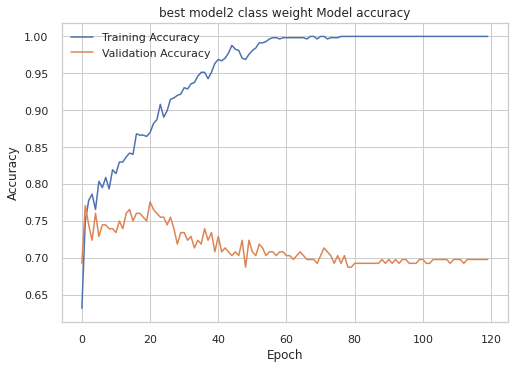

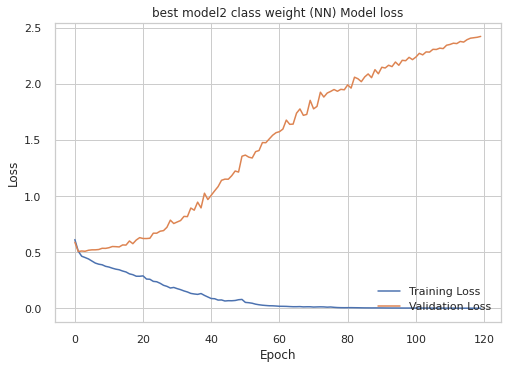

In [99]:
#### Plot training & validation accuracy values
figsize = (25, 12)
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('best model2 class weight Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='upper left')
plt.show()

#### Plot training & validation loss values
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('best model2 class weight (NN) Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Validation Loss'], loc='lower right')
plt.show()

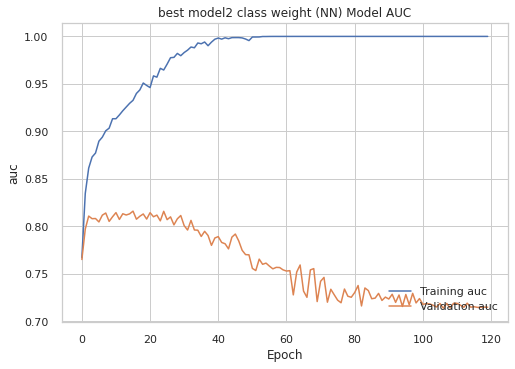

In [100]:
#### Plot training & validation loss values
plt.plot(model.history.history['auc'])
plt.plot(model.history.history['val_auc'])
plt.title('best model2 class weight (NN) Model AUC')
plt.ylabel('auc')
plt.xlabel('Epoch')
plt.legend(['Training auc', 'Validation auc'], loc='lower right')
plt.show()

In [ ]:
##### load saved model #####

In [102]:
model_best2_classweight =keras.models.load_model('model-best2-class-weight-DAAN-570.h5')

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op RandomUniform in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Sub in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mul in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Add in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost

In [103]:
model_best2_classweight.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 76)                684       
_________________________________________________________________
dense_1 (Dense)              (None, 72)                5544      
_________________________________________________________________
dense_2 (Dense)              (None, 72)                5256      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 73        
Total params: 11,557
Trainable params: 11,557
Non-trainable params: 0
_________________________________________________________________


Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDatasetV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Ide

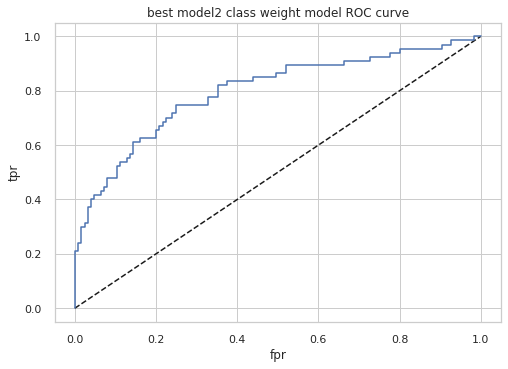

In [105]:
from sklearn.metrics import roc_curve
y_pred_proba = model_best2_classweight.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='best model2 class weight')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('best model2 class weight model ROC curve')
plt.show()

In [106]:
print('Classification report:\n\n',classification_report(y_test,model_best2_classweight.predict_classes(X_test)))

Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDatasetV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op M

In [129]:
from sklearn.metrics import f1_score

# calculate F1 score
f1_score(y_test,model_best2_classweight.predict_classes(X_test),average='weighted')

Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDatasetV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op M

0.7671111726344284

In [107]:
print('Accuracy of our model is: ', accuracy_score(y_test,model_best2_classweight.predict_classes(X_test)))

Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDatasetV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op M

In [108]:
roc_auc_score(y_test, model_best2_classweight.predict_classes(X_test))

Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDatasetV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op M

0.7339701492537314

### Which model has best performance, why?

##### Accuracy of our model is:  0.7708333333333334
##### roc_auc_score :  0.7339701492537314
##### F1 - Score = 0.7671111726344284

##### This model perfomers better than any of the previous models
##### adding class weight to our model helped our nextwork make a better job understanding our minority class
##### After 5-10 training epochs our models start overfitting our data. We  only have a total of 768 observations.
#####  Lower batch sizes leads to increase our test accuracy.
##### GPU training and validation helped increase the speed in training time.
##### has a total of : 11,557 params
##### I used adam optimizer with a lr = 0.0017996162392571403, Adam performed better than SGD
##### Still feels that some outliers could be influencing our nextwork

#####  CNN architecture 

In [111]:
with tf.device("gpu:1"):
   print("tf.keras code in this scope will run on GPU")
# define model architecture
k.clear_session()

cnn_model = Sequential()

cnn_model.add(Dense(units= 12, kernel_initializer = 'uniform', activation = 'relu', input_dim = 8))
cnn_model.add(Dense(units= 6, kernel_initializer = 'uniform', activation = 'relu'))
cnn_model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

cnn_model.summary()

tf.keras code in this scope will run on GPU
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op DestroyResourceOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op DestroyResourceOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op DestroyResourceOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op RandomUniform in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Sub in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mul in device /job:localhost/replica

In [112]:
with tf.device("gpu:1"):
   print("tf.keras code in this scope will run on GPU")

# compile model
cnn_model.compile(tf.keras.optimizers.Adam(
    learning_rate=0.0017996162392571403),loss='binary_crossentropy', metrics=METRICS)

tf.keras code in this scope will run on GPU
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0


In [113]:
with tf.device("gpu:1"):
   print("tf.keras code in this scope will run on GPU")
callbacks = [ModelCheckpoint(filepath='model-cnn-weight-DAAN-570.h5', save_best_only=True,verbose=1,
                             monitor='val_loss',
    mode='min')
            ]

tf.keras code in this scope will run on GPU


In [114]:
with tf.device("gpu:1"):
   print("tf.keras code in this scope will run on GPU")

#### train model
history_cnn = cnn_model.fit(X_train, y_train,
                    epochs=120,
                    batch_size=48,
                   validation_data= (X_test, y_test),
                    callbacks=callbacks,
                   class_weight={0:0.768, 1:1.43283582})

tf.keras code in this scope will run on GPU
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDatasetV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replic

In [115]:
pd.DataFrame(cnn_model.history.history)

loss  accuracy  precision    recall       auc  val_loss  \
0    0.692975  0.643229   0.468085  0.164179  0.571090  0.692094   
1    0.691959  0.723958   0.641892  0.472637  0.522408  0.691366   
2    0.689294  0.725694   0.574394  0.825871  0.778614  0.688485   
3    0.683248  0.734375   0.583333  0.835821  0.821658  0.682369   
4    0.672062  0.727431   0.573333  0.855721  0.818839  0.673233   
..        ...       ...        ...       ...       ...       ...   
115  0.407571  0.793403   0.652985  0.870647  0.886872  0.558454   
116  0.407003  0.796875   0.657895  0.870647  0.887078  0.559550   
117  0.406589  0.795139   0.655431  0.870647  0.887410  0.560302   
118  0.406437  0.791667   0.649446  0.875622  0.887841  0.563236   
119  0.405795  0.793403   0.648551  0.890547  0.888053  0.561920   

     val_accuracy  val_precision  val_recall   val_auc  
0        0.661458       1.000000    0.029851  0.500000  
1        0.718750       0.574713    0.746269  0.631881  
2        0.697917       0.547368    0.776119  0.755403  
3        0.703125       0.553191    0.776119  0.774448  
4        0.697917       0.546392    0.791045  0.779940  
..            ...            ...         ...       ...  
115      0.734375       0.605263    0.686567  0.800119  
116      0.734375       0.605263    0.686567  0.799881  
117      0.723958       0.592105    0.671642  0.799045  
118      0.723958       0.589744    0.686567  0.797970  
119      0.729167       0.597403    0.686567  0.798149  

[120 rows x 10 columns]

In [120]:
def max_metric(model):
    max_acc = max(model.history.history['accuracy'])
    
    min_loss = min(model.history.history['loss'])
    max_val_acc = max(model.history.history['val_accuracy'])
    
    min_val_loss = min(model.history.history['val_loss'])
    print(f"Maximum Accuracy: {max_acc} \n Minimum Binary CrossEntropy Loss: {min_loss} \nMaximum Validation Accuracy: {max_val_acc} \nMaximum Validation Binary CrossEntropy Loss: {min_val_loss} \n")

In [121]:
max_metric(cnn_model)

Maximum Accuracy: 0.796875 
 Minimum Binary CrossEntropy Loss: 0.40579476952552795 
Maximum Validation Accuracy: 0.7552083134651184 
Maximum Validation Binary CrossEntropy Loss: 0.5248948335647583 



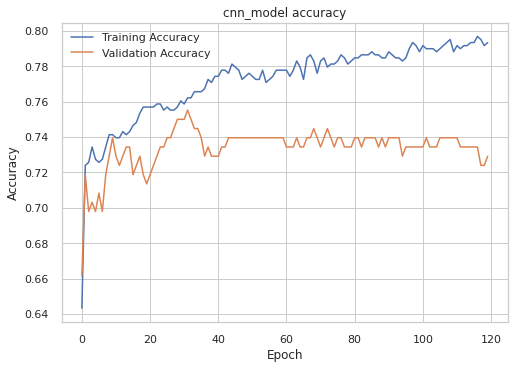

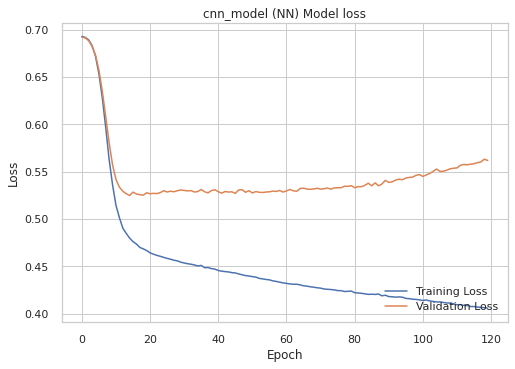

In [122]:
#### Plot training & validation accuracy values
figsize = (25, 12)
plt.plot(cnn_model.history.history['accuracy'])
plt.plot(cnn_model.history.history['val_accuracy'])
plt.title('cnn_model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='upper left')
plt.show()

#### Plot training & validation loss values
plt.plot(cnn_model.history.history['loss'])
plt.plot(cnn_model.history.history['val_loss'])
plt.title('cnn_model (NN) Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Validation Loss'], loc='lower right')
plt.show()

In [124]:
#### load cnn model 

cnn_model_best = keras.models.load_model('model-cnn-weight-DAAN-570.h5')

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op RandomUniform in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Sub in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mul in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Add in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost

Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDatasetV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Ide

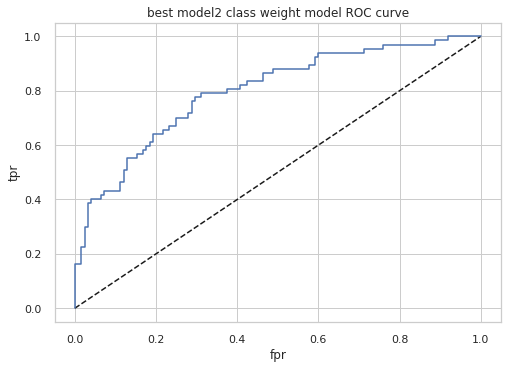

In [125]:
from sklearn.metrics import roc_curve
y_pred_proba = cnn_model_best.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='best model2 class weight')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('best model2 class weight model ROC curve')
plt.show()

In [126]:
print('Accuracy of our model is: ', accuracy_score(y_test,cnn_model_best.predict_classes(X_test)))

Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDatasetV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op M

In [127]:
roc_auc_score(y_test, cnn_model_best.predict_classes(X_test))

Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDatasetV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op M

0.7267462686567164

##### Accuracy of our CNN model is: 0.734375
##### roc_auc_score CNN :  0.7267462686567164

##### Our CNN architecture with class did not beat our previous model.
#### Model started to overfit after 15-20 epochs.